In [122]:
#!pip install textblob

In [123]:

import zipfile
import glob
import docx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob


In [124]:

# Specify the path to the ZIP file
zip_file_path = 'C:/Users/Saily/OneDrive/Documents/project of Data Science/Resumes-20220812T140008Z-001 (1).zip'

directory = 'C:/Users/Saily/OneDrive/Documents/project of Data Science/Resumes-20220812T140008Z-001 (1).zip'
# Specify the directory where you want to extract the files
extract_dir = 'C:/Users/Saily/OneDrive/Documents/project of Data Science/Resumes-20220812T140008Z-001 (1)/Extracted'

In [78]:
doc_files = []
with zipfile.ZipFile(directory, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if file_name.endswith('.docx'):
            doc_files.append(file_name)

In [79]:
paragraphs = []
document_lengths = []

In [80]:
for file_name in doc_files:
    with zipfile.ZipFile(directory, 'r') as zip_ref:
        with zip_ref.open(file_name) as file:
            doc = docx.Document(file)
            text = ' '.join([p.text for p in doc.paragraphs])
            paragraphs.append(text)
            document_lengths.append(len(text))

In [96]:
#df = pd.DataFrame({'Text': paragraphs, 'Document Length': document_lengths})

df = pd.DataFrame(paragraphs, columns=['Text'])
paragraphs = [p.text for p in doc.paragraphs]

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd




# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
word_counts = vectorizer.fit_transform(df['Text'])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate word frequencies
word_frequencies = word_counts.sum(axis=0).A1






In [70]:
#!pip install --upgrade scikit-learn

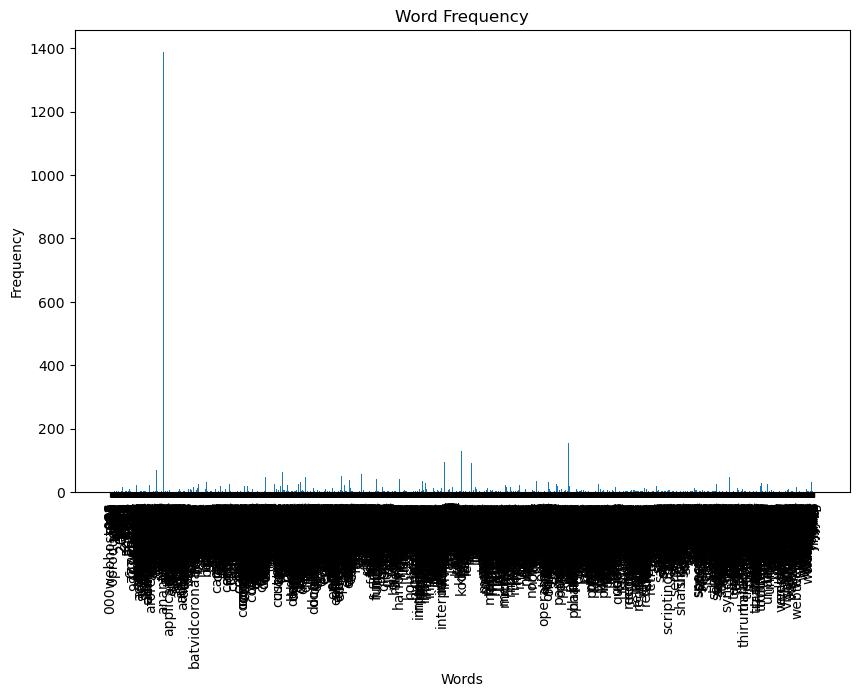

In [30]:

plt.figure(figsize=(10, 6))
plt.bar(feature_names, word_frequencies)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.show()




In [31]:
#!pip install -U scikit-learn

In [32]:
#!pip install -U scikit-learn


In [35]:
# Perform sentiment analysis
sentiment_scores = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)



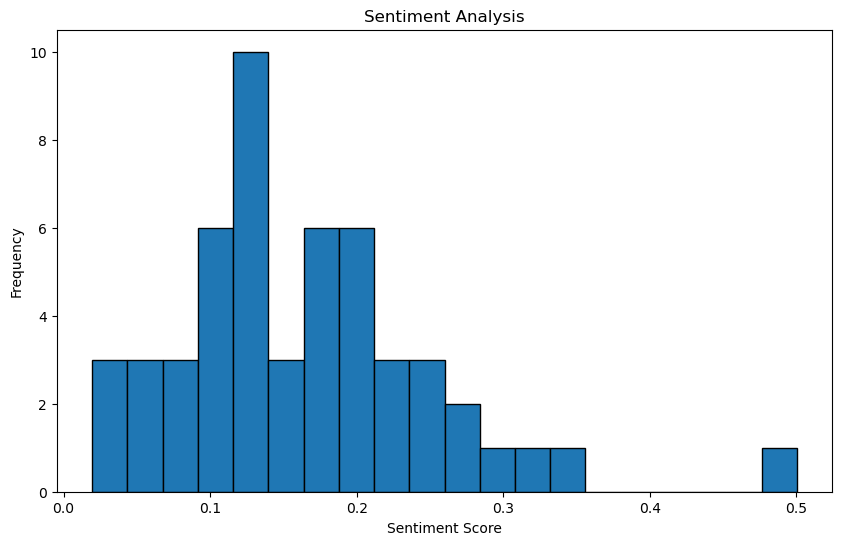

In [36]:
# Plot sentiment analysis
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, edgecolor='k')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.show()


In [37]:
# Apply topic modeling using LDA
n_topics = 5  # Specify the number of topics
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)



LatentDirichletAllocation(n_components=5, random_state=42)

In [40]:
# Print the top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")



Topic 1: the in and of knowledge
Topic 2: to is used js the
Topic 3: customer java am finance learning
Topic 4: and react in js the
Topic 5: and the in to of


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import glob
import docx
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [42]:
directory = 'C:/Users/Saily/OneDrive/Documents/project of Data Science/Resumes-20220812T140008Z-001 (1).zip'

In [43]:
oc_files = glob.glob(directory + '/*.docx')


In [44]:
# Create a list to store the text content of each document
texts = []

In [54]:
import os

file_path = 'C:/Users/Saily/OneDrive/Documents/project of Data Science/Resumes-20220812T140008Z-001 (1)/Resumes/React Developer_Haripriya.docx'

if os.path.isfile(file_path):
    # File exists, continue with processing
    doc = docx.Document(file_path)
    # Rest of your code for processing the document
else:
    # File does not exist, handle the error or choose an appropriate action
    print("File not found: ", file_path)


In [61]:
import docx
import glob
from docx.opc.exceptions import PackageNotFoundError

for file in doc_files:
    try:
        doc = docx.Document(os.path.join(directory, file))
        paragraphs = [p.text for p in doc.paragraphs]
        text = ' '.join(paragraphs)
        texts.append(text)
    except PackageNotFoundError as e:
        print(f"Package not found for file: {file}")
        continue
    

Package not found for file: Resumes/React Developer_Haripriya.docx
Package not found for file: Resumes/React Developer_Naveen sadhu.docx
Package not found for file: Resumes/Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx
Package not found for file: Resumes/Internship_Susovan Bag_Musquare Technologies.docx
Package not found for file: Resumes/Internship_Ravali_Musquare Technologies (1).docx
Package not found for file: Resumes/React Developer_Pragnya.docx
Package not found for file: Resumes/Reactjs Developer_M Lokesh.docx
Package not found for file: Resumes/Reactjs Developer_Pranish Sonone_Musquare Technologies.docx
Package not found for file: Resumes/React Developer_Sarala Madasu-converted.docx
Package not found for file: Resumes/React Developer_Kamalakar Reddy.docx
Package not found for file: Resumes/React JS Developer_Venkatalakshmi (1)-converted.docx
Package not found for file: Resumes/Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx
Package not found for f

In [63]:
# Create a DataFrame to store the text data
df = pd.DataFrame(texts, columns=['Text'])


In [64]:
# Create a DataFrame to store the text data
df = pd.DataFrame(texts, columns=['Text'])


In [117]:
# Perform text preprocessing (e.g., lowercase, remove punctuation, etc.)
#df['Text'] = df['Text'].str.lower()
#df['Label'] = df['Label'].str.lower()

In [118]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df['Text'], labels, test_size=0.2, random_state=42)





In [119]:

#from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called 'df' with columns 'text' and 'target'
#X = df['text']     # Features or input data
#y = df['target']   # Target variable or labels

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
#print("Training set shapes:")
#print("X_train:", X_train.shape)
#print("y_train:", y_train.shape)
#print()
#print("Testing set shapes:")
#print("X_test:", X_test.shape)
#print("y_test:", y_test.shape)


